# LAB A

We'll be using IPython and panads functionality in this part.

Our first goal is to get the information from the log files off of disk and into a dataframe.

Since we're working with limited resources we'll use samples of the larger files.


## Requirements

    IPython
    Pandas
    Matplotlib
    Seaborn
    datetime
    warnings
    
## Tip
To access keyboard shortcuts click on a (non-code) cell or the text "In []" to the left of the cell, and press the *H* key. Or select *Help* from the menu above, and then *Keyboard Shortcuts*. **Very useful saved us a lot of time during editing.

# Business Understanding

## Overview

The dataset that we've selected is from the field of Network Analysis and Security. We are using log files generated by BRO Network Security Monitor as our dataset. The dataset we've choosen has about 20 million records ( about  2 GB in size) and has 22 features with a number of sub-features explained in the feature description sections that follow.

We'll be analyzing the log file, finding the correlation between attack behavioud and the features to come up with probable conclusions and results that helped us in identifying malicious behavior and potential threats and attacks in the network of our dataset.

The plan is to understand the dataset, the features, attack behaviours, and their descriptions in-detail as they are stated by Bro.

We will do a lot of preprocessing including elimination, grouping, standardization, and imputation to try and make the dataset more convenient to work on.

After getting the dataset ready to be processed for extracting valuable statistical information, we then visualized those statistical information using the most appropriate plots (in our case, box plot was used extensively). Then we  grouped some of the features (use them to visualize relationships) and then use correlation matrix to represent all relationships between the different features that are important in our analysis (for example,the services and packets generated as well as received have a high corelation).

## Purpose

We selected this dataset because it is a complex as well as a technical dataset that is used on live data retaining value depending on its freshness. We are interested in learning more about security, its attacks, and their patterns.

The amount of real-time processing that can be done by analyzing the data collected can reduce a lot of manual work and catch patterns in attacks that occur over a large period of time that a human cannot identify.

These logs also allow us to see the amount of data being transferred and allowing organizations to allocate bandwidth depending based on the future scope of usage patterns.

## Importing Modules

In [2]:
import random
import pandas as pd
import requests
import numpy as np

### File sampling
We're working with a log file generated from <a href="http://www.bro.og/">Bro</a>

A Bro log is similar to netflow logs. The log file we're using is huge and doesn't fit in memory.

Therefore, we're setting the variable **sample_percent** to read in between 200k and 300k worth of (randomly selected) lines from the file.

In [2]:
logfile = './conn.log'
sample_percent = .09
num_lines = sum(1 for line in open(logfile))
slines = set(sorted(random.sample(range(num_lines), int(num_lines * sample_percent))))
print (('%s lines in %s, using a sample of %s lines') %(num_lines, logfile, len(slines)))

22694356 lines in ./conn.log, using a sample of 2042492 lines


### File Creation
Now we've a subset of lines to work with.

In the following cell we're writing these lines to a file that we'll be using for the majority of our work.

In [5]:
w = open(outfile, 'w+')
r = open(logfile, 'r+')
linecount = 0
for line in r:
    if linecount in slines:
        w.write(line)
    linecount += 1
w.close()
r.close()

### File Input (CSV)
In the following cell we're using pandas to create a dataframe, and then it reading our newly created file conn_sample.log  into memory.

We're using the separator "\t" because Bro produces tab-delimited files by default.

We've also specified the columns labels in the dataframe.

Loading the data into the dataframe 'conn_df'.

We're naming the features using the default BRO feature names.

# Data Understanding

We're using a Log file named con.log that was created in BRO. Con.log is used for tracking/logging of general information regarding TCP, UDP, and ICMP traffic.

### Features Description

**ts - (time) Timestamp**

**uid - (string) Unique ID of Connection**

**id.orig_h - (addr) Originating endpoint's IP address**

**id.orig_p - (port) Originating endpoint's TCP/UDP port (or ICMP code)**

**id.resp_h - (addr) Responding endpoint's IP address**

**id.resp_p - (port) Responding endpoint's TCP/UDP port (or ICMP code)**

**proto - (transport_proto) Transport layer protocol of connection**

**service - (string) Dynamically detected application protocol**

**duration - (interval) Time of last packet seen till time of first packet seen**

**orig_bytes - (count) Originator payload bytes; from sequence numbers if TCP**

**resp_bytes - (count) Responder payload bytes; from sequence numbers if TCP**

**conn_state - (string) Connection state**

    S0 	    Connection attempt seen, no reply
    S1 	    Connection established, not terminated
    SF 	    Normal establishment and termination.
    REJ        Connection attempt rejected
    S2 	    Connection established and close attempt by originator seen
    S3 	    Connection established and close attempt by responder seen
    RSTO       Connection established, originator aborted (sent a RST)
    RSTR       Established, responder aborted
    RSTOS0     Originator sent a SYN followed by a RST, no SYN-ACK from the responder
    RSTRH      Responder sent a SYN ACK followed by a RST, no SYN from the originator
    SH 	    Originator sent a SYN followed by FIN, no SYN ACK from the responder 1/2 open
    SHR        Responder sent a SYN ACK followed by a FIN, no SYN from the originator
    OTH        No SYN seen, just midstream traffic “partial connection” not closed

**local_orig - (bool) If connection is local T; if connection is remote F**

**local_resp - (bool) If the connection is responded to locally, this value will be T. If it was responded to remotely it will be F.**

**missed_bytes - (count) Number of missing bytes in content gaps**

**history - (string) Connection state History, records the state history of connections as a string of letters. The meaning of those letters is:**
   
    
    s 	a SYN w/o the ACK bit set
    h 	a SYN+ACK (“handshake”)
    a 	a pure ACK
    d 	packet with payload (“data”)
    f 	packet with FIN bit set
    r 	packet with RST bit set
    c 	packet with a bad checksum
    i 	inconsistent packet (e.g. SYN+RST bits both set)

**orig_pkts - (count) Number of ORIG packets**

**orig_ip_bytes - (count) Number of ORIG IP bytes**

**resp_pkts - (count) Number of RESP packets**

**resp_ip_bytes - (count) Number of RESP IP bytes**

**tunnel_parents - (set) If tunneled, connection UID of encapsulating parent**

**threat - (string) **

**sample - (string) **


In [3]:
outfile = './conn_sample.log'
df = pd.read_csv(outfile, sep="\t", header=None, names=['ts','uid','id.orig_h','id.orig_p','id.resp_h','id.resp_p','proto','service','duration','orig_bytes','resp_bytes','conn_state','local_orig','missed_bytes','history','orig_pkts','orig_ip_bytes','resp_pkts','resp_ip_bytes','tunnel_parents','threat','sample'])

### Verifying Input
Checking the contents of the file should be in a nicely laid-out dataframe.

We've experimented by calling the **head()** and **tail()** method to see the values at the beginning and end of the dataframe.

In [25]:
df.head()
#df.tail()
#df.head(100)
#df.tail(100)

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,threat,sample
0,1.331901e+09,CHEt7z3AzG4gyCNgci,192.168.202.79,50465,192.168.229.251,80,tcp,http,0.010000,166,...,-,0,ShADfFa,4,382,3,382,(empty),NaN,NaN
1,1.331901e+09,CQ7uZu2HtGNngGZl5c,192.168.202.79,50475,192.168.229.251,80,tcp,http,0.020000,164,...,-,0,ShADfFa,4,380,3,382,(empty),NaN,NaN
2,1.331901e+09,CkzNrm1sDTsMMEeh9k,192.168.202.79,50481,192.168.229.251,80,tcp,http,0.020000,166,...,-,0,ShADfFa,4,382,3,382,(empty),NaN,NaN
3,1.331901e+09,Ciqb7K1g3EiiYw9yJ6,192.168.202.79,46172,192.168.229.254,443,tcp,ssl,0.010000,548,...,-,0,ShADadfFr,8,972,13,1744,(empty),NaN,NaN
4,1.331901e+09,CUizGO0zdE2JOgEj5,192.168.202.79,50547,192.168.229.251,80,tcp,http,0.020000,164,...,-,0,ShADfFa,4,380,3,382,(empty),NaN,NaN


### Data Summarization

The **describe()** and **info** methods will give a summarization of all columns.

In [26]:
df.describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ts,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,threat,sample
count,2.042492e+06,2.042492e+06,2.042492e+06,2.042492e+06,2.042492e+06,2.042492e+06,2.042492e+06,2.042492e+06,0.0,0.0
mean,1.331949e+09,4.268344e+04,2.036530e+04,1.002105e+03,1.977306e+00,3.881878e+02,1.411877e+00,4.238005e+02,NaN,NaN
std,4.273060e+04,1.533603e+04,2.062343e+04,1.431965e+06,2.808612e+02,2.841267e+05,2.331180e+02,1.320433e+05,NaN,NaN
min,1.331901e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,1.331908e+09,3.594700e+04,2.107000e+03,0.000000e+00,1.000000e+00,4.400000e+01,0.000000e+00,0.000000e+00,NaN,NaN
50%,1.331928e+09,4.431600e+04,1.008600e+04,0.000000e+00,1.000000e+00,4.800000e+01,1.000000e+00,4.000000e+01,NaN,NaN
75%,1.331997e+09,5.443000e+04,3.765100e+04,0.000000e+00,1.000000e+00,6.000000e+01,1.000000e+00,4.000000e+01,NaN,NaN
max,1.332018e+09,6.553500e+04,6.553500e+04,2.046504e+09,2.709420e+05,4.032375e+08,2.102820e+05,1.008973e+08,NaN,NaN


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042492 entries, 0 to 2042491
Data columns (total 22 columns):
ts                float64
uid               object
id.orig_h         object
id.orig_p         int64
id.resp_h         object
id.resp_p         int64
proto             object
service           object
duration          object
orig_bytes        object
resp_bytes        object
conn_state        object
local_orig        object
missed_bytes      int64
history           object
orig_pkts         int64
orig_ip_bytes     int64
resp_pkts         int64
resp_ip_bytes     int64
tunnel_parents    object
threat            float64
sample            float64
dtypes: float64(3), int64(7), object(12)
memory usage: 342.8+ MB


### Data Types

Checking for the type of information Python stored in each column.

In [8]:
df.dtypes

ts                float64
uid                object
id.orig_h          object
id.orig_p           int64
id.resp_h          object
id.resp_p           int64
proto              object
service            object
duration           object
orig_bytes         object
resp_bytes         object
conn_state         object
local_orig         object
missed_bytes        int64
history            object
orig_pkts           int64
orig_ip_bytes       int64
resp_pkts           int64
resp_ip_bytes       int64
tunnel_parents     object
threat            float64
sample            float64
dtype: object

# Data Quality

From the previous cell outputs we can see that we've a lot of missing values.

    The ts feature is using an invalid datatype.
    orig_bytes and resp_bytes have invalid datatypes as object.
    Serice has a lot of missing values in the dataset.
    The columns Threat and Sample have a lot of NaN values.

## Imputing
Regarding the service feature, we tried imputing but the results were inaccurate. Imputing by using mode the solution that we get is invalid since services cannot be imputed since they are not dependent on each other. For example, nine HTTP service in no way relates to the 10th being an HTTP service. 

## Outliers
After thorough analysis we've seen significant outliers in the amount of packets being used (orig_bytes, orig_ip_bytes, resp_ip_bytes, and resp_bytes). This is due to the nature of traffic and relation between a service being used for file transfer or for connection authentication. For example, in the feature orig_ip_bytes the mean is around a 100bytes but the maximum goes to about 100 MB.

We'll be improving the dataquality in the cells that follow.

## Converting Feature Types
We're chaninging the ts (time stamp) feature to a datetime object using the function *to_datetime()*.

In [4]:
from datetime import datetime
df['ts'] = [datetime.fromtimestamp(float(date)) for date in df['ts'].values]

In [29]:
df.dtypes

ts                datetime64[ns]
uid                       object
id.orig_h                 object
id.orig_p                  int64
id.resp_h                 object
id.resp_p                  int64
proto                     object
service                   object
duration                  object
orig_bytes                object
resp_bytes                object
conn_state                object
local_orig                object
missed_bytes               int64
history                   object
orig_pkts                  int64
orig_ip_bytes              int64
resp_pkts                  int64
resp_ip_bytes              int64
tunnel_parents            object
threat                   float64
sample                   float64
dtype: object

##### Testing a small operation for fun
In the following code we're trying to find the percentage of TCP connections:

In [12]:
float(len(df[df.proto=='tcp']))/len(df.proto)*100.0

98.20469309059717

## Changing Data Types

Converting object datatype to numeric types

In [5]:
df.convert_objects(convert_numeric=True).dtypes

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


ts                datetime64[ns]
uid                       object
id.orig_h                 object
id.orig_p                  int64
id.resp_h                 object
id.resp_p                  int64
proto                     object
service                   object
duration                 float64
orig_bytes               float64
resp_bytes               float64
conn_state                object
local_orig                object
missed_bytes               int64
history                   object
orig_pkts                  int64
orig_ip_bytes              int64
resp_pkts                  int64
resp_ip_bytes              int64
tunnel_parents            object
threat                   float64
sample                   float64
dtype: object

Here, we can see that *orig_bytes* and *resp_bytes* have been changed to the type *float64*.

# Data Exploration

We'll start with the statistical summary of the data here.

We first remove some unnecessary features and NaN values. The features *ts*, *uid*, *id.orig_h*, *id.resp_h*, *threat* are removed without affecting our data's statistical integrity.

In [6]:
import numpy as np
df_without = df.drop(['threat','sample'], axis=1)
df.drop(df.columns[[0, 1, 2, 4, 11, 18, 19]], axis=1) 
df_without.describe(include=[np.number])

,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes
count,2.042492e+06,2.042492e+06,2.042492e+06,2.042492e+06,2.042492e+06,2.042492e+06,2.042492e+06
mean,4.268344e+04,2.036530e+04,1.002105e+03,1.977306e+00,3.881878e+02,1.411877e+00,4.238005e+02
std,1.533603e+04,2.062343e+04,1.431965e+06,2.808612e+02,2.841267e+05,2.331180e+02,1.320433e+05
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.594700e+04,2.107000e+03,0.000000e+00,1.000000e+00,4.400000e+01,0.000000e+00,0.000000e+00
50%,4.431600e+04,1.008600e+04,0.000000e+00,1.000000e+00,4.800000e+01,1.000000e+00,4.000000e+01
75%,5.443000e+04,3.765100e+04,0.000000e+00,1.000000e+00,6.000000e+01,1.000000e+00,4.000000e+01
max,6.553500e+04,6.553500e+04,2.046504e+09,2.709420e+05,4.032375e+08,2.102820e+05,1.008973e+08


---
#### Note
What is really worth mentioning here is the **dynamic range** of these attributes.
You can see that most of the features has a minimum value of zero, whereas the maximum value is significantly large. This is not an error, it is because of the sessions and the nature of the service requested. One might ask for an **http** page that will download a huge content, where another request might just be requesting for authentication or syn / ack packets ranging under 4KBs of data. 

We will see this dynamic range problem in further visualized plots.

---

In [32]:
df_without.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2042492 entries, 0 to 2042491
Data columns (total 20 columns):
ts                datetime64[ns]
uid               object
id.orig_h         object
id.orig_p         int64
id.resp_h         object
id.resp_p         int64
proto             object
service           object
duration          object
orig_bytes        object
resp_bytes        object
conn_state        object
local_orig        object
missed_bytes      int64
history           object
orig_pkts         int64
orig_ip_bytes     int64
resp_pkts         int64
resp_ip_bytes     int64
tunnel_parents    object
dtypes: datetime64[ns](1), int64(7), object(12)
memory usage: 311.7+ MB


In addition to the preceding steps we're will provide more statistical information.

### Median

In [33]:
df.median()

id.orig_p        44316.0
id.resp_p        10086.0
missed_bytes         0.0
orig_pkts            1.0
orig_ip_bytes       48.0
resp_pkts            1.0
resp_ip_bytes       40.0
threat               NaN
sample               NaN
dtype: float64

We can see that the median for the *orig_ip_bytes* and the *resp_ip_bytes* is too small compared to their max values.

The mean and the median of our numeric features are too small when comapred with the ORIG and RESP bytes.

When we see the maximum values they look like outliers that is due to the nature of our data or traffic that depends on the different type of connections and the services being used.

### Variance

In [34]:
df.var()

id.orig_p        2.351937e+08
id.resp_p        4.253259e+08
missed_bytes     2.050524e+12
orig_pkts        7.888302e+04
orig_ip_bytes    8.072797e+10
resp_pkts        5.434402e+04
resp_ip_bytes    1.743543e+10
threat                    NaN
sample                    NaN
dtype: float64

### Mode

We will show the mode for ORIG bytes, RESP bytes, and the entire dataframe.

In [7]:
print('The mode of the ORIG bytes :')
print(df.orig_ip_bytes.mode())
print('The mode of the RESP bytes:')
print(df.resp_ip_bytes.mode())
print('The mode of the the entire dataframe:')
print(df.mode())

The mode of the ORIG bytes :
0    60
dtype: int64
The mode of the RESP bytes:
0    40
dtype: int64
The mode of the the entire dataframe:
                       ts  uid       id.orig_h  id.orig_p       id.resp_h  \
0 2012-03-16 16:24:00.780  NaN  192.168.204.45      63805  192.168.206.44   

   id.resp_p proto service duration orig_bytes  ...   local_orig missed_bytes  \
0         80   tcp       -        -          -  ...            -            0   

  history  orig_pkts orig_ip_bytes  resp_pkts  resp_ip_bytes  tunnel_parents  \
0      Sr          1            60          1             40         (empty)   

   threat sample  
0     NaN    NaN  

[1 rows x 22 columns]


We can conclude from the Mode that the local IP addresses are being used most, i.e, the local traffic is more.
The protocol TCP and port numbers 80 are being used the most and TCP uses port number 80.
*orig_ip_bytes* is 60, a SYN packet is of 60-bit in size.
*history* is Sr that means that the SYN packet is being sent the most.
*resp_ip_bytes* is 40, a FIN packet is of 40-bit in size.

These confirm that a SYN flood attack is targetting the network, which is one of the most common form of a DDoS attack.

*SYN flood is a form of denial-of-service attack in which an attacker sends a succession of SYN requests to a target's system in an attempt to consume enough server resources to make the system unresponsive to legitimate traffic.*

## Range

Now let's find the Range of the ORIG and RESP IP bytes.

This will give us an indication of the amount of bandwidth is being used. This can be used to estimate the amount of bandwidth that we may need in the future or may be needed in case of a DDoS attack to maintain availability. 

We can solve the *Dynamic Range problem* by subtracting the mean and dividing it by the standard deviation, as done in the following cells.


In [9]:
print('The Range of the ORIG IP bytes is: ')
origin_range = df.orig_ip_bytes.max() - df.orig_ip_bytes.min()
print(origin_range)
print('Mean is: ', df.orig_ip_bytes.mean())
print('Max is: ', df.orig_ip_bytes.max())
print('Minimum is: ', df.orig_ip_bytes.min())
print('-------------')
print('The Range of the RESP IP bytes is: ' )
resp_range = df.resp_ip_bytes.max() - df.resp_ip_bytes.min()
print(resp_range)
print('Mean is: ', df.resp_ip_bytes.mean())
print('Max is: ', df.resp_ip_bytes.max())
print('Min is: ', df.resp_ip_bytes.min())

The Range of the ORIG IP bytes is: 
403237512
Mean is:  388.18780098037104
Max is:  403237512
Minimum is:  0
-------------
The Range of the RESP IP bytes is: 
100897254
Mean is:  423.80049664821206
Max is:  100897254
Min is:  0


## Grouping and Features Manipulation

We will group and create a dataframe grouped using features.

Grouping by protocol *proto* shows that 98% of the connections are using TCP: 

In [10]:
df_grouped = df.groupby(by='proto')
print(df_grouped.service.count())
print('---------------------------------------')
#print('---------------------------------------')
#print(df_grouped.service.sum() / df_grouped.service.count())
df_grouped_diff=df.groupby(by='service')
print(df_grouped_diff.service.count())

proto
icmp      16456
tcp     2005823
udp       20213
Name: service, dtype: int64
---------------------------------------
service
-           1982365
dhcp            288
dns           14443
ftp             255
ftp-data        276
http          39931
smtp             16
ssh             450
ssl            4468
Name: service, dtype: int64


Now we are looking at a summary of df with the http service. 

In [11]:
df[df['service'] == 'http'].describe()

C:\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id.orig_p,id.resp_p,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,threat,sample
count,39931.000000,39931.000000,3.993100e+04,39931.000000,39931.000000,39931.000000,3.993100e+04,0.0,0.0
mean,29682.222384,941.843555,5.125100e+04,13.595703,2226.880945,11.583356,7.463287e+03,NaN,NaN
std,23001.110512,2251.897572,1.024136e+07,67.301293,9389.058833,290.303332,4.341702e+05,NaN,NaN
min,1025.000000,80.000000,0.000000e+00,3.000000,202.000000,1.000000,4.800000e+01,NaN,NaN
25%,3510.000000,80.000000,0.000000e+00,5.000000,581.000000,4.000000,6.990000e+02,NaN,NaN
50%,37977.000000,80.000000,0.000000e+00,6.000000,673.000000,5.000000,1.903000e+03,NaN,NaN
75%,50690.000000,80.000000,0.000000e+00,8.000000,840.000000,9.000000,8.514000e+03,NaN,NaN
max,65534.000000,8080.000000,2.046504e+09,11322.000000,634654.000000,57588.000000,8.637622e+07,NaN,NaN


From the above table we can see that the traffic from http *resp_ip_bytes* is a lot more than *orig_ip_bytes*. This confirms  an HTTP Flood attack.

*HTTP flood is a type of Distributed Denial of Service (DDoS) attack in which the attacker exploits seemingly-legitimate HTTP GET or POST requests to attack a web server or application.*

*HTTP flood attacks are volumetric attacks, often using a botnet “zombie army”—a group of Internet-connected computers, each of which has been maliciously taken over, usually with the assistance of malware like Trojan Horses.*

# Visualization

##### Box plot
Hunting for some meaningful information. Plotting to have a rough idea about the size of most of the ORIG bytes. 

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


{'boxes': [<matplotlib.lines.Line2D at 0xd82fcf128>],
 'caps': [<matplotlib.lines.Line2D at 0xd82fdfd68>,
 'fliers': [<matplotlib.lines.Line2D at 0xd82fe4f60>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xd82fe4748>],
 'whiskers': [<matplotlib.lines.Line2D at 0xd82fcfcf8>,
  <matplotlib.lines.Line2D at 0xd82fcfe80>]}

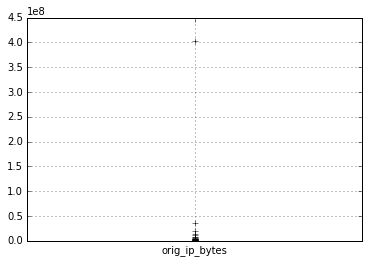

In [12]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline
ax = df.boxplot(column='orig_ip_bytes')
ax

### Slicing the Data
The dynamic range of *orig_ip_bytes* is huge so we run this on a slice of data.

Checking the IP bytes less than 1500 

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xda55064e0>],
 'caps': [<matplotlib.lines.Line2D at 0xda550ee80>,
 'fliers': [<matplotlib.lines.Line2D at 0xda551a748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xda5513860>],
 'whiskers': [<matplotlib.lines.Line2D at 0xda5506e10>,
  <matplotlib.lines.Line2D at 0xda5506f98>]}

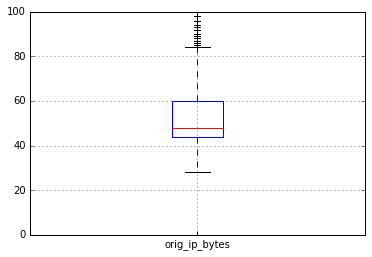

In [13]:
df[df.orig_ip_bytes < 100].boxplot(column='orig_ip_bytes')

We can see that most of the ORIG bytes lie withing 40 - 60 bytes confirming that most of the packets are service initiation packets, in a regular scenario this should not've been the case.


Now we use the same box plot on **resp_ip_bytes** feature.

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xda5572ef0>],
 'caps': [<matplotlib.lines.Line2D at 0xda557f898>,
 'fliers': [<matplotlib.lines.Line2D at 0xda5584a90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xda5584278>],
 'whiskers': [<matplotlib.lines.Line2D at 0xda5579908>,
  <matplotlib.lines.Line2D at 0xda5579f98>]}

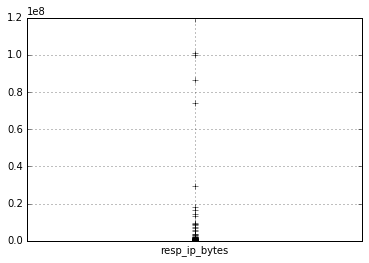

In [14]:
ay = df.boxplot(column='resp_ip_bytes')
ay

The packet size is smaller with a few outliers showing actual traffic. This demonstrates that flood attacks are leading the replying / response systems to repsond to every ORIG packet.

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0xda55ec4e0>],
 'caps': [<matplotlib.lines.Line2D at 0xda55f2e80>,
 'fliers': [<matplotlib.lines.Line2D at 0xda55fd748>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0xda55f7860>],
 'whiskers': [<matplotlib.lines.Line2D at 0xda55ece10>,
  <matplotlib.lines.Line2D at 0xda55ecf98>]}

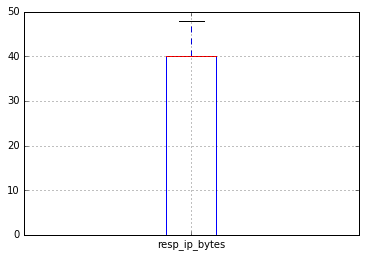

In [15]:
df[df.resp_ip_bytes < 50].boxplot(column='resp_ip_bytes')

### Normalization and Standardization

Looking at the dynamic range of the preceding figures Normalization of the data frame
is expected.

In the following cell we will normalize the ORIG bytes and the RESP bytes in the box plot.


In [16]:
orig_norm = (df.orig_ip_bytes-df.orig_ip_bytes.mean())/(df.orig_ip_bytes.std())
resp_norm = (df.resp_ip_bytes-df.resp_ip_bytes.mean())/(df.resp_ip_bytes.std())
print('The normalized values of the originated bytes and the response bytes are:')
print('Originated Bytes:')
print(orig_norm.min(), orig_norm.max(), orig_norm.mean())
print('----------------------------------------------')
print('Response Bytes:')
print(resp_norm.min(), resp_norm.max(), resp_norm.mean())

The normalized values of the originated bytes and the response bytes are:
Originated Bytes:
-0.00136624905448 1419.21600253 -5.275135448512914e-15
----------------------------------------------
Response Bytes:
-0.00320955736297 764.119360002 3.7434361842081723e-14


Even after normalization the dynamic range is **extremely high**.

The maximum is around 1000 whereas the minimum is around 0.004 for RESP bytes and 0.01 for ORIG bytes.

The reason for this is that during the peak usage we see surge in the traffic that spreads out our data's dynamic range even more.

These peak usage are potential buffer overflow threats.

Thus we decided to used the data without normalization and ignoring the outliers.

---

# Grouping and Visualization

Grouping by service is a very useful and informative way of visualizing relationships and statistical information between differrent attributes.

The following plot gives us a decent enough idea about our data.

#for example: the responded http ip packets (resp_ip_bytes) are mostly less than 5 MBytes ..
#same way we can get a rough idea about the other features 

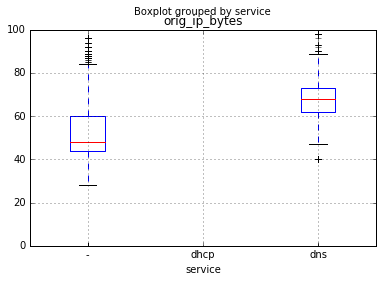

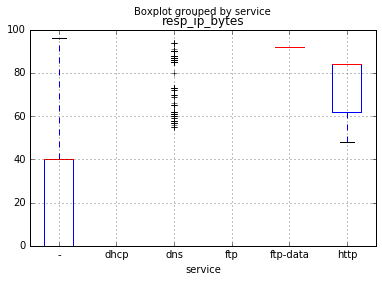

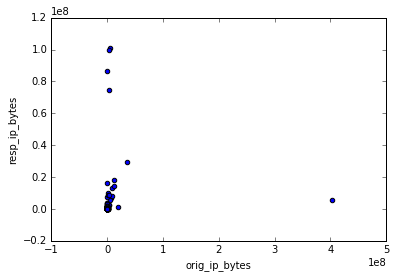

In [17]:
df[df.orig_ip_bytes < 100].boxplot(column='orig_ip_bytes', by='service')
df[df.resp_ip_bytes < 100].boxplot(column='resp_ip_bytes', by='service')
from pandas.tools.plotting import scatter_matrix
df.plot(kind = 'scatter', x='orig_ip_bytes', y = 'resp_ip_bytes')

The preceding box plots shows that huge amount of packets being sent under unidentified services (probably applications specific protocols) and the large number of packets being send via DNS shows *DNS Flooding* is taking place.

The scatter plot is showing a *reationship between RESP bytes and ORIG bytes* that was invisible earlier using box plots. When the overflow packets are being send that are larger in size the *buffer overflow* on the receiver's side does not allow the receiver to send a response confirming a *Ping of Death* attack. *SYN Flood* occuring when the size of ORIG and RESP packets is small and large in count.

#### Box Plot for Port numbers and Services

This plot will try to visualize and relate the ORIG port numbers and the RESP port numbers.

Another useful grouping has been done here by relating the service with the RESP and ORIG port numbers. This is being used to visualize the range of port numbers over which the services are being run on.

The  port numbers are standardized for certain services.

The box plots are giving a spread over which the port numbers are being used and the mediam is the most common port number being used by the respective service. 

In the following plots the outliers can be potential threats. 

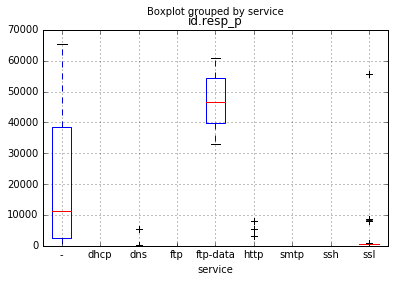

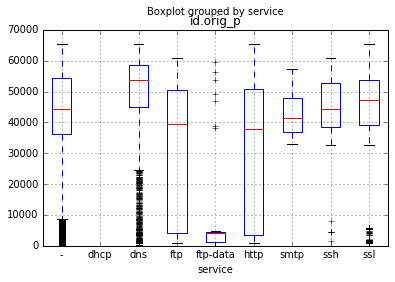

In [20]:
df.boxplot(column='id.resp_p', by='service')
df.boxplot(column='id.orig_p', by='service')

#### Working with the Scatter plot to find a relationship between RESP port and RESP bytes 

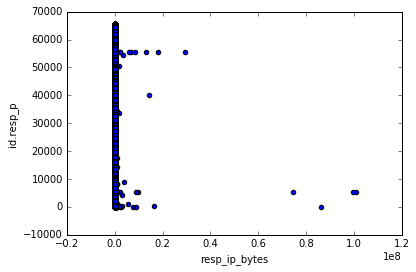

In [22]:
from pandas.tools.plotting import scatter_matrix
df.plot(kind='scatter',x='resp_ip_bytes', y='id.resp_p')

Here we can see that the response packets don't change much. 
The *probable attacks* can be seen in the **RESP bytes > 100MB** area that are below the port number 10000 as these are the most commonly used ports and do not transfer packets that huge.

The spread between higher packet sizes between the port range from **50000 - 65500** shows a trend in **P2P or uTP (Torrent) traffic** that has a high data usage.

##### Using Seaborn for a clearer understanding of the relationship between ORIG IP bytes, ORIG port number, RESP IP Bytes, and RESP Port numbers.

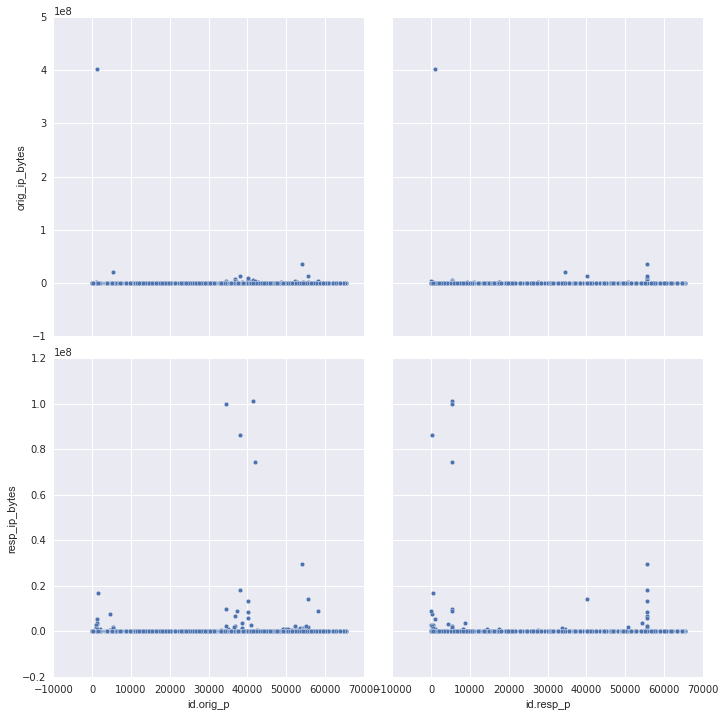

In [24]:
import seaborn as sns
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
g = sns.pairplot(df, size=5,
           x_vars=["id.orig_p", "id.resp_p"],
               y_vars=["orig_ip_bytes", "resp_ip_bytes"])

This scatter plots is an easy way to understand the traffic patters that we can see in the ⟨host,port⟩ pairs. It also shows the relationship between the ORIG Bytes and RESP Bytes varying with port numbers.

### Plotting Relations using Correlation Matrix

The number of features we used is large. The services show a huge correlation between the ORIG and RESP bytes as well as Port numbers.

In order to summarize this large correlation of features and services we are using seaborn correlation matrix.

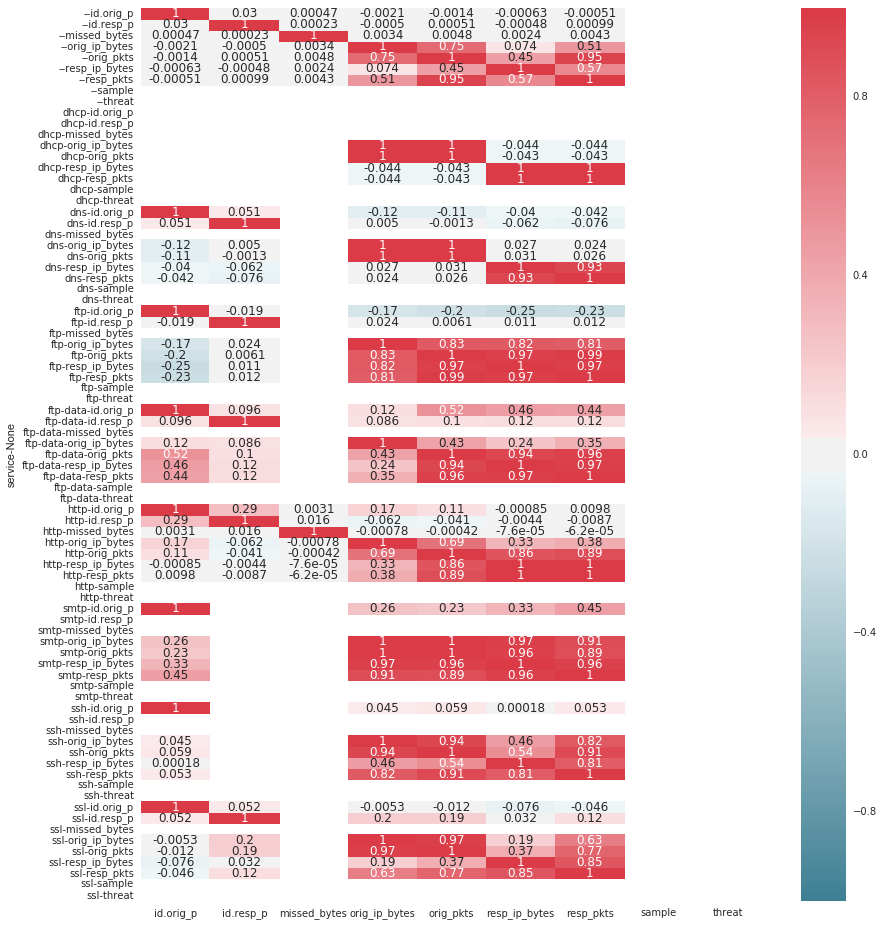

In [26]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(13, 13))

sns.heatmap(df_grouped_diff.corr(), cmap=cmap, annot=True)

f.tight_layout()

From this visualization we can see the high correlation between all the fields with numbers close to 1. It summarizes the behaviour of the traffic that was recorded in our dataset.

This plot reduces the number of plots / figures that show the relationship between the features.

# Extra Feature Infomation

If we have access to other log files, also generated by BRO,  we can triangulate the correlation in attacks from all of the files realtime. The log files can be:

**http log** (contains features representing HTTP traffic thta represents majority of our traffic data) 

**host_detections log** (HOST - PORT pair data that gave us multiple probabilities of attacks can be confirmed using the features from the host_detections log file) 

**malicious domains log** (this file contains a list and behavioud of all the malicous domains relating to which we can confirm the attacks) 

**originating IP bytes log** (recorded by BRO at the same time and has addition IP features) 

**honey pot log ** (most common exploits and honeypots database taht records their behaviour)

# Additional Analysis

Here we will use column indexing and compare the port number with the service to indicate if there is an attack or a potential threat.
Using Port numbers and service is a very potent way of identifying potential threats.
We know the standard port number for services. For example: http uses 80 , ssl uses 443 , and so on. We will use this to our advantage to scan for abnormal port usage patterns.

#### First, we can use the service column to check the SSL only connections and their properties:

In [27]:
df[df['service'] == 'ssl'].head()

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,threat,sample
3,2012-03-16 07:30:00.350,Ciqb7K1g3EiiYw9yJ6,192.168.202.79,46172,192.168.229.254,443,tcp,ssl,0.010000,548,...,-,0,ShADadfFr,8,972,13,1744,(empty),NaN,NaN
13,2012-03-16 07:30:00.920,CjvvrhmtrWeWYGOS9,192.168.202.79,46259,192.168.229.254,443,tcp,ssl,0.010000,537,...,-,0,ShADadfFr,8,961,13,1744,(empty),NaN,NaN
15,2012-03-16 07:30:01.060,CtYpeO1nppTrLZ4aV9,192.168.202.79,46282,192.168.229.254,443,tcp,ssl,0.020000,538,...,-,0,ShADadfFr,8,962,13,1744,(empty),NaN,NaN
16,2012-03-16 07:30:01.150,CptMG83s5BriyUV5Zf,192.168.202.79,46294,192.168.229.254,443,tcp,ssl,0.010000,535,...,-,0,ShADadfFr,8,959,13,1744,(empty),NaN,NaN
20,2012-03-16 07:30:01.460,ClsXVX2xtIA14cbDaf,192.168.202.79,46337,192.168.229.254,443,tcp,ssl,0.010000,537,...,-,0,ShADadfFr,8,961,13,1744,(empty),NaN,NaN


This df shows all the features with an SSL connection.

SSL is a security protcol and a connection using SSL on a port other than 443 is considered as a potential attack:

In [29]:
ssldf = df[df['service'] == 'ssl']
ssldf[ssldf['id.resp_p'] != 443] 

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,threat,sample
85995,2012-03-16 07:54:24.110000,CKZoNf3p0swqK833ea,192.168.203.61,52398,192.168.202.68,55553,tcp,ssl,9.150000,77011,...,-,0,ShADad,844,197926,848,144246,(empty),NaN,NaN
137007,2012-03-16 08:12:33.320000,CEjKho3ggKp5eGRQse,192.168.203.45,41701,192.168.21.203,995,tcp,ssl,0.210000,504,...,-,0,ShADadFRf,13,1164,8,1883,(empty),NaN,NaN
143623,2012-03-16 08:14:25.280000,CpmoaL3d3H7p2lqRcf,192.168.202.110,54102,192.168.21.203,993,tcp,ssl,0.050000,479,...,-,0,ShADadFRf,11,1035,7,1817,(empty),NaN,NaN
145154,2012-03-16 08:14:48.810000,CycyUB2RdRV4gX8YQk,192.168.202.110,43028,192.168.21.253,8089,tcp,ssl,10.000000,146,...,-,0,ShADaFdfR,6,442,5,1547,(empty),NaN,NaN
268003,2012-03-16 08:20:59.080000,CR0vWv1580T3MWklIc,192.168.202.110,48627,192.168.27.253,8089,tcp,ssl,0.020000,649,...,-,0,ShADadfR,7,1021,6,2136,(empty),NaN,NaN
268702,2012-03-16 08:21:02.330000,CiY5oq1kvCNz7YAJW7,192.168.202.110,48815,192.168.27.253,8089,tcp,ssl,0.080000,633,...,-,0,ShADadfR,8,1057,6,2136,(empty),NaN,NaN
268857,2012-03-16 08:20:58.090000,CO6rVJ3SuvWtlRPEYi,192.168.202.110,48538,192.168.27.253,8089,tcp,ssl,5.180000,649,...,-,0,ShADadfR,10,1177,6,2136,(empty),NaN,NaN
281153,2012-03-16 08:21:50.530000,CHydBn4RmTiCKQtYDc,192.168.202.110,54744,192.168.27.253,8089,tcp,ssl,0.050000,30,...,-,0,ShADadR,5,298,3,757,(empty),NaN,NaN
281740,2012-03-16 08:21:52.420000,C0ciIE1eznCG6Gwxs6,192.168.202.110,54946,192.168.27.253,8089,tcp,ssl,0.090000,1672,...,-,0,ShADadR,15,2460,13,6749,(empty),NaN,NaN
282034,2012-03-16 08:21:53.540000,CFFVz03bzjkSbzbZn,192.168.202.110,55071,192.168.27.253,8089,tcp,ssl,0.010000,50,...,-,0,ShADadR,5,318,3,1464,(empty),NaN,NaN


As we can see, we have about 526 probable attacks using the SSL protocol.

#### http Attacks

HTTP uses port 80 by default. Using the same method, we can identify potential HTTP attacks.
By looking at just the http service we get:

In [30]:
httpdf = df[df['service'] == 'http']
httpdf[httpdf['id.resp_p'] != 80]

,ts,uid,id.orig_h,id.orig_p,id.resp_h,id.resp_p,proto,service,duration,orig_bytes,...,local_orig,missed_bytes,history,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,tunnel_parents,threat,sample
47973,2012-03-16 07:44:37.400,Co6t244zB6vM0kleKa,192.168.202.79,33056,192.168.229.251,5488,tcp,http,0.020000,18,...,-,0,ShADdfFa,6,338,5,1065,(empty),NaN,NaN
49374,2012-03-16 07:46:48.440,ChorN9iASARIf0Fse,192.168.202.79,38732,192.168.229.153,5357,tcp,http,0.540000,168,...,-,0,ShADfFa,5,436,3,351,(empty),NaN,NaN
49377,2012-03-16 07:46:49.250,CqS41F1PCUA6ohwok3,192.168.202.79,38753,192.168.229.153,5357,tcp,http,0.280000,167,...,-,0,ShADfFa,5,435,3,351,(empty),NaN,NaN
49383,2012-03-16 07:46:50.070,CKYMC1244koEomGWYa,192.168.202.79,38774,192.168.229.153,5357,tcp,http,0.260000,181,...,-,0,ShADfFa,5,449,3,351,(empty),NaN,NaN
49492,2012-03-16 07:46:52.460,CTKe841vG4Zd7aP026,192.168.202.79,38841,192.168.229.153,5357,tcp,http,0.270000,165,...,-,0,ShADfFa,5,433,3,351,(empty),NaN,NaN
49778,2012-03-16 07:46:57.670,CFL5hv38jdHa7l5GKg,192.168.202.79,38950,192.168.229.153,5357,tcp,http,0.260000,169,...,-,0,ShADfFa,5,437,3,351,(empty),NaN,NaN
49780,2012-03-16 07:46:58.190,CR240F1AAusHtAAvw6,192.168.202.79,38961,192.168.229.153,5357,tcp,http,0.260000,172,...,-,0,ShADfFa,5,440,3,351,(empty),NaN,NaN
49869,2012-03-16 07:47:01.140,CNXZ2J1f9fe0U72yM6,192.168.202.79,39024,192.168.229.153,5357,tcp,http,0.260000,164,...,-,0,ShADfFa,5,432,3,351,(empty),NaN,NaN
49966,2012-03-16 07:47:01.400,Cco8kc3zkLilGVgPV8,192.168.202.79,33892,192.168.229.251,5488,tcp,http,0.210000,157,...,-,0,ShADdfFa,7,529,5,1065,(empty),NaN,NaN
50048,2012-03-16 07:47:04.990,CXAXz3QIVUzsv17A1,192.168.202.79,39116,192.168.229.153,5357,tcp,http,0.260000,169,...,-,0,ShADfFa,5,437,3,351,(empty),NaN,NaN


Filtering all the connections on ports other than 80 we can see 5849 records that are potential threats because they used an http service not used port 80.

To check for abnormality in the amount of bytes being sent / received we calculate the mean of RESP bytes of the potentially attacked ssl service:

In [31]:
ssldf['resp_ip_bytes'].mean()

11219.173231871084

The mean of the RESP bytes for the HTTP service is:

In [32]:
httpdf['resp_ip_bytes'].mean()

7463.286569332098

SSL bytes size is more than normal, confirming malicious behaviour.

-----